In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import feature_extractor as fe
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import pandas as pd
import numpy as np
sys.path.append('../..')
import omama as O

In [3]:
# cache_path = "/home/ryan.zurrin001/binlink/sample_dataset.pkl"
cache_path = "/home/ryan.zurrin001/binlink/cs438_feature_cache_bak.pkl"

In [4]:
# Load the DataFrame
df_features = pd.read_pickle(cache_path)

In [5]:
len(df_features)

163568

In [5]:
import data_cleaner as dc

In [6]:
cleaner = dc.DataCleaner(df_features)

In [8]:
df_features = cleaner.clean_data()

In [9]:
len(df_features)

161299

In [10]:
df_features.columns

Index(['label', 'ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'ExposureInuAs', 'KVP', 'BodyPartThickness',
       'CompressionForce', 'PositionerPrimaryAngle', 'ViewPosition',
       'DetectorTemperature', 'DetectorType', 'Rows', 'Columns', 'score',
       'target_label', 'coords1', 'coords2', 'coords3', 'coords4',
       'resized_coords1', 'resized_coords2', 'resized_coords3',
       'resized_coords4', 'FieldOfViewOrigin1', 'FieldOfViewOrigin2',
       'WindowCenter1', 'WindowCenter2', 'WindowCenter3', 'WindowCenter4',
       'WindowWidth1', 'WindowWidth2', 'WindowWidth3', 'WindowWidth4',
       'histogram_mean', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75'],
      dtype='object')

In [11]:
unique_values = df_features.nunique()

print("Number of unique values per column:")
print(unique_values)

Number of unique values per column:
label                            2
ImageLaterality                  2
PatientAge                     775
Manufacturer                     6
ManufacturerModelName           29
DistanceSourceToDetector         2
DistanceSourceToPatient         77
ExposureTime                  2480
XRayTubeCurrent                 46
Exposure                       281
ExposureInuAs                 2311
KVP                             21
BodyPartThickness              118
CompressionForce               541
PositionerPrimaryAngle         269
ViewPosition                     4
DetectorTemperature            765
DetectorType                     2
Rows                             5
Columns                          6
score                       160895
target_label                     2
coords1                       2641
coords2                       2846
coords3                       2673
coords4                       2901
resized_coords1                250
resized_coords2    

In [12]:
unique_values = df_features.nunique()

print("Number of unique values per column:")
print(unique_values)

Number of unique values per column:
label                            2
ImageLaterality                  2
PatientAge                     775
Manufacturer                     6
ManufacturerModelName           29
DistanceSourceToDetector         2
DistanceSourceToPatient         77
ExposureTime                  2480
XRayTubeCurrent                 46
Exposure                       281
ExposureInuAs                 2311
KVP                             21
BodyPartThickness              118
CompressionForce               541
PositionerPrimaryAngle         269
ViewPosition                     4
DetectorTemperature            765
DetectorType                     2
Rows                             5
Columns                          6
score                       160895
target_label                     2
coords1                       2641
coords2                       2846
coords3                       2673
coords4                       2901
resized_coords1                250
resized_coords2    

In [27]:
unique_values_df = unique_values.reset_index()
unique_values_df.columns = ['Column', 'Unique_values']

print(unique_values_df)

                      Column  Unique_values
0                      label              2
1            ImageLaterality              2
2                 PatientAge            775
3               Manufacturer              6
4      ManufacturerModelName             29
5   DistanceSourceToDetector              2
6    DistanceSourceToPatient             77
7               ExposureTime           2480
8            XRayTubeCurrent             46
9                   Exposure            281
10             ExposureInuAs           2311
11                       KVP             21
12         BodyPartThickness            118
13          CompressionForce            541
14    PositionerPrimaryAngle            269
15              ViewPosition              4
16       DetectorTemperature            765
17              DetectorType              2
18                      Rows              5
19                   Columns              6
20                     score         160895
21        FieldOfViewOrigin1    

In [13]:
# Define your features and target variable
X = df_features.drop('label', axis=1)  # all columns except the label
y = df_features['label']  # the target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
len(X_train)

129039

In [15]:
len(X_test)

32260

In [16]:
len(y_train)

129039

In [17]:
len(y_test)

32260

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Calculate class weights
class_weights = {0: 1,
                 1: (len(y_train) - sum(y_train)) / sum(y_train)}

model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 22.030340888809565},
                       random_state=42)

In [20]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30768
           1       1.00      0.97      0.99      1492

    accuracy                           1.00     32260
   macro avg       1.00      0.99      0.99     32260
weighted avg       1.00      1.00      1.00     32260

[[30768     0]
 [   42  1450]]


In [41]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# history = model.fit(X_train_scaled, y_train)

In [38]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30768
           1       0.78      0.23      0.35      1492

    accuracy                           0.96     32260
   macro avg       0.87      0.61      0.67     32260
weighted avg       0.96      0.96      0.95     32260

[[30673    95]
 [ 1151   341]]


In [35]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     30768
           1       0.78      0.23      0.35      1492

    accuracy                           0.96     32260
   macro avg       0.87      0.61      0.67     32260
weighted avg       0.96      0.96      0.95     32260

[[30673    95]
 [ 1151   341]]


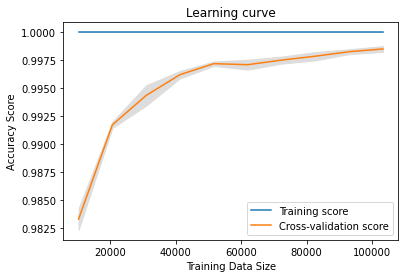

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train_scaled, y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1, scoring='accuracy'
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()


In [ ]:


X = df_features.drop(columns=['label'])  # Assuming 'label' is the column with your labels
y = df_features['label']
# Normalize or standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Dataset Splitting
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Selection
model = RandomForestClassifier(random_state=42)

# Training
model.fit(X_train, y_train)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    # Add other parameters here
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_val, y_val)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
importances = best_model.feature_importances_
# Analyze the importance for insight

# Visualize feature importances if needed
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))